# Reading in Data

In [1]:
import sys

sys.path.append('..')

In [2]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [3]:
import logging

logging.basicConfig(level=logging.INFO)

In [4]:
from train_test_split import select_train, select_eval
from preprocessing import preprocess

[nltk_data] Downloading package stopwords to /Users/jonas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/jonas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jonas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### prepare data

In [5]:
df_train = select_train()
df_train['train'] = True
df_train

,index,text,label,train
0,157049,jennifer lawrence the queen of derp . <url>\n,1,True
1,2366208,airbake by wearever nonstick 15-1 / 2 by 20 - ...,0,True
2,1948945,apparently its main event time for #ufc145 . i...,0,True
3,1684769,<user> <user> i'll say it again ( about ko i l...,0,True
4,2262152,deep stall : the turbulent story of boeing com...,0,True
...,...,...,...,...
159995,896920,"<user> you know i'm keeping the change , right...",1,True
159996,1730334,<user> oh how i wish that was me you and danie...,0,True
159997,1253719,"good morning , digger ( paperback when digger ...",0,True
159998,1722897,henry dunay : a precious life ( hardcover henr...,0,True


In [6]:
df_test = select_eval()
df_test['train'] = False
df_test

,index,text,label,train
0,922648,sunny day with my bff <user> <url>\n,1,False
1,944379,"<user> also , that statement wasn't really dir...",1,False
2,2182552,thoughts are with former dons striker lee mill...,0,False
3,786886,- excitedd for my lil'mans party ! thanks to h...,1,False
4,1130778,shout out to <user> xoxo\n,1,False
...,...,...,...,...
39995,2334957,<user> get out of bed and do your fucking essa...,0,False
39996,2114074,<user> yeah i'm gonna be tired all day man xxx\n,0,False
39997,1993502,<user> guess ? why ? haha nothing .. and you ?\n,0,False
39998,1861715,would have liked to see reecey tomorrow . but ...,0,False


In [8]:
df = pd.concat([df_train, df_test])
df['x'] = df['text']
df['x'] = df['x'].apply(lambda x: x.replace('\n', ''))
df

,index,text,label,train,x
0,157049,jennifer lawrence the queen of derp . <url>\n,1,True,jennifer lawrence the queen of derp . <url>
1,2366208,airbake by wearever nonstick 15-1 / 2 by 20 - ...,0,True,airbake by wearever nonstick 15-1 / 2 by 20 - ...
2,1948945,apparently its main event time for #ufc145 . i...,0,True,apparently its main event time for #ufc145 . i...
3,1684769,<user> <user> i'll say it again ( about ko i l...,0,True,<user> <user> i'll say it again ( about ko i l...
4,2262152,deep stall : the turbulent story of boeing com...,0,True,deep stall : the turbulent story of boeing com...
...,...,...,...,...,...
39995,2334957,<user> get out of bed and do your fucking essa...,0,False,<user> get out of bed and do your fucking essa...
39996,2114074,<user> yeah i'm gonna be tired all day man xxx\n,0,False,<user> yeah i'm gonna be tired all day man xxx
39997,1993502,<user> guess ? why ? haha nothing .. and you ?\n,0,False,<user> guess ? why ? haha nothing .. and you ?
39998,1861715,would have liked to see reecey tomorrow . but ...,0,False,would have liked to see reecey tomorrow . but ...


In [9]:
PREPROCESSING = {'remove_tags': True}

preprocess(df, flags=PREPROCESSING)
df

,index,text,label,train,x
0,157049,jennifer lawrence the queen of derp . <url>\n,1,True,jennifer lawrence the queen of derp .
1,2366208,airbake by wearever nonstick 15-1 / 2 by 20 - ...,0,True,airbake by wearever nonstick 15-1 / 2 by 20 - ...
2,1948945,apparently its main event time for #ufc145 . i...,0,True,apparently its main event time for #ufc145 . i...
3,1684769,<user> <user> i'll say it again ( about ko i l...,0,True,i'll say it again ( about ko i love that man ....
4,2262152,deep stall : the turbulent story of boeing com...,0,True,deep stall : the turbulent story of boeing com...
...,...,...,...,...,...
39995,2334957,<user> get out of bed and do your fucking essa...,0,False,get out of bed and do your fucking essay puto ...
39996,2114074,<user> yeah i'm gonna be tired all day man xxx\n,0,False,yeah i'm gonna be tired all day man xxx
39997,1993502,<user> guess ? why ? haha nothing .. and you ?\n,0,False,guess ? why ? haha nothing .. and you ?
39998,1861715,would have liked to see reecey tomorrow . but ...,0,False,would have liked to see reecey tomorrow . but ...


In [10]:
try:
    os.remove('tweets.txt')
except OSError:
    pass

f = open('tweets.txt', 'w')
for index, row in df.iterrows():
    f.write(row['x']+"\n")
f.close()

### embeddings

In [11]:
import fasttext

In [12]:
model = fasttext.train_unsupervised('tweets.txt', model='skipgram', dim=100)

Read 3M words
Number of words:  21050
Number of labels: 0
Progress: 100.0% words/sec/thread:  198373 lr:  0.000000 avg.loss:  2.115795 ETA:   0h 0m 0s


In [13]:
df['vec'] = df['x'].apply(model.get_sentence_vector)

In [14]:
df

,index,text,label,train,x,vec
0,157049,jennifer lawrence the queen of derp . <url>\n,1,True,jennifer lawrence the queen of derp .,"[-0.020565245, -0.07422235, 0.058913026, -0.01..."
1,2366208,airbake by wearever nonstick 15-1 / 2 by 20 - ...,0,True,airbake by wearever nonstick 15-1 / 2 by 20 - ...,"[-0.021653965, -0.05054209, 0.076005474, 0.001..."
2,1948945,apparently its main event time for #ufc145 . i...,0,True,apparently its main event time for #ufc145 . i...,"[-0.01818528, -0.02202938, 0.047273908, 0.0440..."
3,1684769,<user> <user> i'll say it again ( about ko i l...,0,True,i'll say it again ( about ko i love that man ....,"[-0.008956195, -0.00075647724, 0.013096188, 0...."
4,2262152,deep stall : the turbulent story of boeing com...,0,True,deep stall : the turbulent story of boeing com...,"[0.019564454, -0.07369761, 0.07645501, -0.0039..."
...,...,...,...,...,...,...
39995,2334957,<user> get out of bed and do your fucking essa...,0,False,get out of bed and do your fucking essay puto ...,"[0.009455874, -0.05761846, 0.0080824075, -0.01..."
39996,2114074,<user> yeah i'm gonna be tired all day man xxx\n,0,False,yeah i'm gonna be tired all day man xxx,"[0.004094833, -0.014904776, 0.03236907, 0.0463..."
39997,1993502,<user> guess ? why ? haha nothing .. and you ?\n,0,False,guess ? why ? haha nothing .. and you ?,"[-0.0521558, -0.021604707, 0.02056469, -0.0705..."
39998,1861715,would have liked to see reecey tomorrow . but ...,0,False,would have liked to see reecey tomorrow . but ...,"[-0.024886185, -0.02227643, 0.024846008, -0.01..."


### clustering

In [15]:
# sum_of_squared_distances = []
# K = range(1,10)
# for k in tqdm(range(1, 10)):
#     km = KMeans(n_clusters=k)
#     km = km.fit(pd.DataFrame(df['vec'].values.tolist()))
#     sum_of_squared_distances.append(km.inertia_)

In [16]:
# plt.plot(K, sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [17]:
kmeans = KMeans(n_clusters=7)

In [18]:
df['cluster'] = kmeans.fit_predict(df['vec'].values.tolist())

In [19]:
df

,index,text,label,train,x,vec,cluster
0,157049,jennifer lawrence the queen of derp . <url>\n,1,True,jennifer lawrence the queen of derp .,"[-0.020565245, -0.07422235, 0.058913026, -0.01...",4
1,2366208,airbake by wearever nonstick 15-1 / 2 by 20 - ...,0,True,airbake by wearever nonstick 15-1 / 2 by 20 - ...,"[-0.021653965, -0.05054209, 0.076005474, 0.001...",6
2,1948945,apparently its main event time for #ufc145 . i...,0,True,apparently its main event time for #ufc145 . i...,"[-0.01818528, -0.02202938, 0.047273908, 0.0440...",3
3,1684769,<user> <user> i'll say it again ( about ko i l...,0,True,i'll say it again ( about ko i love that man ....,"[-0.008956195, -0.00075647724, 0.013096188, 0....",3
4,2262152,deep stall : the turbulent story of boeing com...,0,True,deep stall : the turbulent story of boeing com...,"[0.019564454, -0.07369761, 0.07645501, -0.0039...",4
...,...,...,...,...,...,...,...
39995,2334957,<user> get out of bed and do your fucking essa...,0,False,get out of bed and do your fucking essay puto ...,"[0.009455874, -0.05761846, 0.0080824075, -0.01...",3
39996,2114074,<user> yeah i'm gonna be tired all day man xxx\n,0,False,yeah i'm gonna be tired all day man xxx,"[0.004094833, -0.014904776, 0.03236907, 0.0463...",3
39997,1993502,<user> guess ? why ? haha nothing .. and you ?\n,0,False,guess ? why ? haha nothing .. and you ?,"[-0.0521558, -0.021604707, 0.02056469, -0.0705...",3
39998,1861715,would have liked to see reecey tomorrow . but ...,0,False,would have liked to see reecey tomorrow . but ...,"[-0.024886185, -0.02227643, 0.024846008, -0.01...",3


In [20]:
df.groupby('cluster')['label'].value_counts()

cluster  label
0        1        22077
         0        11053
1        0         2005
         1            2
2        1        15832
         0         3659
3        1        31431
         0        30809
4        0        16685
         1         2535
5        1        27872
         0        22798
6        0        12973
         1          269
Name: label, dtype: int64

In [21]:
df[df['train']][['text', 'label', 'cluster']].to_csv('train.csv')

In [22]:
df[~df['train']][['text', 'cluster']].to_csv('test.csv')

### visualize clustering

In [23]:
pca = PCA(n_components=3)
res = pca.fit_transform(df['vec'].values.tolist())

df['coord_x'] = res[:,0]
df['coord_y'] = res[:,1]
df['coord_z'] = res[:,2]

print(pca.explained_variance_ratio_)

[0.23037573 0.06463499 0.04502407]


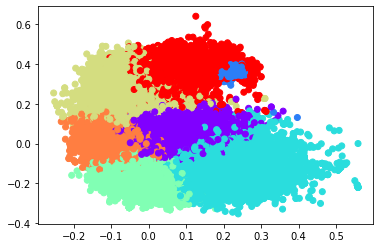

In [24]:
plt.scatter(df['coord_y'], df['coord_x'], c=df['cluster'], cmap='rainbow')

/var/folders/gq/4c0zg0rx0pv4n82cfglq0vb00000gn/T/ipykernel_37449/1593339746.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)


Text(0.5, 0.92, 'Tweet Clustering using K Means')

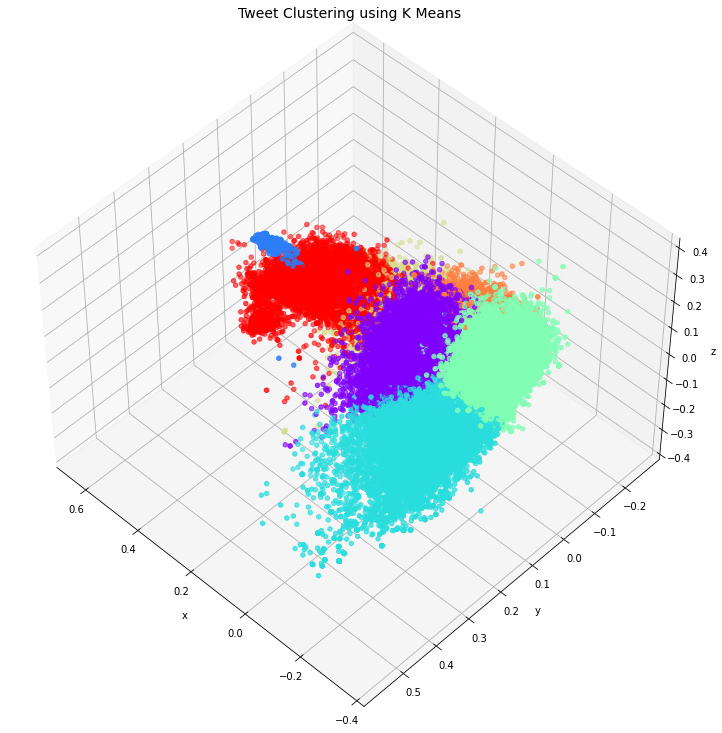

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(df['coord_x'], df['coord_y'], df['coord_z'], c=df['cluster'], cmap='rainbow')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Tweet Clustering using K Means", fontsize=14)